In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('fullsample.csv')

In [3]:
raw_data.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
0,30616928,RUNNING,2021-07-31T22:15:00,Unknown,2048Mn,0,10:04:00,67-22:14:22,1,1,production,0:0
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05T11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05T19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0
3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07T20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0
4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10T16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0


In [4]:
raw_data[raw_data["EXITCODE"]!="0:0"]

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
18,31418105,NODE_FAIL,2021-08-19T10:09:50,2021-09-17T08:45:10,92160Mn,0,41-16:00:00,28-22:35:20,1,8,cgw-dougherty1,1:0
42,31669402,CANCELLED,2021-08-28T10:53:59,2021-09-05T10:53:57,65536Mn,5229.75M,8-00:00:00,7-23:59:58,9,10,production,0:15
1023,31798622,CANCELLED,2021-08-31T02:46:09,2021-09-05T02:46:09,40960Mn,1440.95M,5-00:00:00,5-00:00:00,4,4,turing,0:15
1029,31798672,CANCELLED,2021-08-31T02:53:48,2021-09-05T02:54:09,40960Mn,1438.46M,5-00:00:00,5-00:00:21,4,4,turing,0:15
1212,31807053,CANCELLED,2021-08-31T09:28:28,2021-09-01T08:10:32,16384Mn,11784.19M,2-00:00:00,22:42:04,1,1,production,0:9
...,...,...,...,...,...,...,...,...,...,...,...,...
7387597,25469985_9,CANCELLED,2020-10-30T13:46:03,2020-10-31T13:46:06,8192Mn,5018.02M,1-00:00:00,1-00:00:03,1,4,production,0:15
7387598,25469985_10,FAILED,2020-10-30T13:46:33,2020-10-30T13:46:54,8192Mn,0,1-00:00:00,00:00:21,1,4,production,1:0
7387599,25469985_11,FAILED,2020-10-30T13:46:26,2020-10-30T13:46:37,8192Mn,11.43M,1-00:00:00,00:00:11,1,4,production,1:0
7387600,25469985_12,FAILED,2020-10-30T13:46:29,2020-10-30T13:46:37,8192Mn,0,1-00:00:00,00:00:08,1,4,production,1:0


In [6]:
#doge['rolling_7_day_average'] = doge.rolling('7d', on = 'Date')['Close'].mean()
#raw_data["rolling_7_day_average"] = raw_data

In [75]:
test_df = raw_data[raw_data["END"]!="Unknown"][1:100000]


In [76]:
test_df['BEGIN'] = test_df['BEGIN'].str.replace('T',' ')
test_df['END'] = test_df['END'].str.replace('T',' ')

In [77]:
test_df['BEGIN'] = test_df['BEGIN'].astype("datetime64[ns]")
test_df['END'] = test_df['END'].astype("datetime64[ns]")
print(test_df)

               JOBID      STATE               BEGIN                 END  \
2           30858137  COMPLETED 2021-08-06 19:04:39 2021-09-05 19:04:53   
3           30935078  COMPLETED 2021-08-09 16:52:51 2021-09-07 20:52:55   
4         31364111_2  COMPLETED 2021-08-17 07:45:07 2021-09-10 16:45:24   
5         31364111_3  COMPLETED 2021-08-17 07:45:07 2021-09-06 16:17:34   
6         31364111_4  COMPLETED 2021-08-17 07:45:07 2021-09-06 06:25:11   
...              ...        ...                 ...                 ...   
100002  32002391_276  COMPLETED 2021-09-03 19:13:03 2021-09-03 19:25:43   
100003  32002391_277  COMPLETED 2021-09-03 19:13:03 2021-09-03 19:28:09   
100004  32002391_278  COMPLETED 2021-09-03 19:13:17 2021-09-03 19:30:58   
100005  32002391_279  COMPLETED 2021-09-03 19:13:17 2021-09-03 19:26:25   
100006  32002391_280  COMPLETED 2021-09-03 19:14:04 2021-09-03 19:27:38   

          REQMEM    USEDMEM      REQTIME     USEDTIME  NODES  CPUS  \
2       204800Mn  57553.77M  

In [78]:
test_df['Difference'] = (test_df['BEGIN'] - test_df['END']).dt.seconds
print(test_df)
print(test_df[['Difference','USEDTIME']])

               JOBID      STATE               BEGIN                 END  \
2           30858137  COMPLETED 2021-08-06 19:04:39 2021-09-05 19:04:53   
3           30935078  COMPLETED 2021-08-09 16:52:51 2021-09-07 20:52:55   
4         31364111_2  COMPLETED 2021-08-17 07:45:07 2021-09-10 16:45:24   
5         31364111_3  COMPLETED 2021-08-17 07:45:07 2021-09-06 16:17:34   
6         31364111_4  COMPLETED 2021-08-17 07:45:07 2021-09-06 06:25:11   
...              ...        ...                 ...                 ...   
100002  32002391_276  COMPLETED 2021-09-03 19:13:03 2021-09-03 19:25:43   
100003  32002391_277  COMPLETED 2021-09-03 19:13:03 2021-09-03 19:28:09   
100004  32002391_278  COMPLETED 2021-09-03 19:13:17 2021-09-03 19:30:58   
100005  32002391_279  COMPLETED 2021-09-03 19:13:17 2021-09-03 19:26:25   
100006  32002391_280  COMPLETED 2021-09-03 19:14:04 2021-09-03 19:27:38   

          REQMEM    USEDMEM      REQTIME     USEDTIME  NODES  CPUS  \
2       204800Mn  57553.77M  

In [79]:
test_df = test_df.sort_values("END")

In [90]:
#doge['rolling_7_day_average'] = doge.rolling('7d', on = 'Date')['Close'].mean()
#traffic['total_crashes_30_days'] = (traffic
 #.rolling('30d', on = 'Date and Time')['Accident Number']
 #.count())
test_df["rolling_1_hour_average"] = (test_df.rolling("60min", on = "END")["EXITCODE"].count())

In [94]:
test_df[1099:1105]

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,Difference,rolling_1_hour_average
1099,31874232_2772,COMPLETED,2021-08-31 23:59:07,2021-09-01 00:05:05,2048Mn,146.46M,00:15:00,00:05:58,1,1,production,0:0,86042,1100.0
1100,31874232_2801,COMPLETED,2021-08-31 23:59:07,2021-09-01 00:05:05,2048Mn,147.06M,00:15:00,00:05:58,1,1,production,0:0,86042,1101.0
1101,31874232_3298,COMPLETED,2021-09-01 00:02:07,2021-09-01 00:05:06,2048Mn,146.41M,00:15:00,00:02:59,1,1,production,0:0,86221,1102.0
1102,31874232_2800,COMPLETED,2021-08-31 23:59:07,2021-09-01 00:05:06,2048Mn,146.85M,00:15:00,00:05:59,1,1,production,0:0,86041,1103.0
1103,31873051_612,COMPLETED,2021-08-31 23:51:36,2021-09-01 00:05:06,4096Mc,2190.17M,05:00:00,00:13:30,1,1,production,0:0,85590,1104.0
1104,31874232_2778,COMPLETED,2021-08-31 23:59:07,2021-09-01 00:05:06,2048Mn,146.29M,00:15:00,00:05:59,1,1,production,0:0,86041,1105.0


In [92]:
test_df = test_df.reset_index(drop=True)
print(test_df)

               JOBID      STATE               BEGIN                 END  \
0      31874232_1775  COMPLETED 2021-08-31 23:54:05 2021-09-01 00:00:01   
1      31874232_1746  COMPLETED 2021-08-31 23:54:05 2021-09-01 00:00:01   
2      31874232_2266  COMPLETED 2021-08-31 23:57:05 2021-09-01 00:00:01   
3      31874232_1828  COMPLETED 2021-08-31 23:55:05 2021-09-01 00:00:02   
4      31874232_1770  COMPLETED 2021-08-31 23:54:05 2021-09-01 00:00:02   
...              ...        ...                 ...                 ...   
99994     31364111_8  COMPLETED 2021-08-25 00:42:46 2021-09-16 18:49:44   
99995    31364111_24  COMPLETED 2021-08-25 00:42:46 2021-09-16 21:53:04   
99996     31364111_7  COMPLETED 2021-08-25 00:42:46 2021-09-16 21:55:36   
99997    31364111_23  COMPLETED 2021-08-25 00:42:46 2021-09-16 23:57:20   
99998       31418105  NODE_FAIL 2021-08-19 10:09:50 2021-09-17 08:45:10   

        REQMEM    USEDMEM      REQTIME     USEDTIME  NODES  CPUS  \
0       2048Mn    146.61M     0

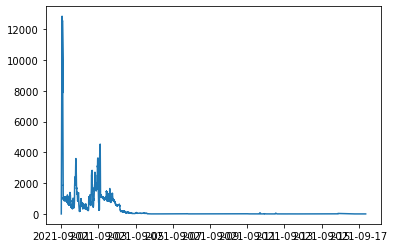

In [93]:
plt.plot((test_df["END"]),test_df["rolling_1_hour_average"])

plt.show()

In [ ]:
print(test_df)

In [ ]:
#splits time in month and hour columns
begin_time_df = test_df["BEGIN"].str.split("T",1,expand=True)
begin_named_time_df = begin_time_df.rename(columns={0:"begin_date",1:"begin_time"})
end_time_df = test_df["END"].str.split("T",1,expand=True)
end_named_time_df = end_time_df.rename(columns={0:"end_date",1:"end_time"})
be_time_df = begin_named_time_df.join(end_named_time_df)
be_time_df["begin_date"] = be_time_df["begin_date"].astype("datetime64[ns]")
be_time_df["end_date"] = be_time_df["end_date"].astype("datetime64[ns]")
be_time_df["begin_time"] = be_time_df["begin_time"].astype("datetime64[ns]")
be_time_df["end_time"] = be_time_df["end_time"].astype("datetime64[ns]")
print(be_time_df)

In [ ]:
test_time_df = test_df.join(be_time_df)
print(test_time_df)

In [ ]:
test_time_df['Difference'] = (test_time_df['begin_time'] - test_time_df['end_time']).dt.seconds
print(test_time_df)

In [ ]:
time_ex = raw_data["BEGIN"][1]
print(raw_data["BEGIN"][1])

In [ ]:
new_time = time_ex.split("T",1)
new_format_time = new_time[0] + " " + new_time[1]
print(new_format_time)

In [ ]:
print(datetime.strptime(new_format_time, '%Y-%m-%d %H:%M:%S'))